In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
filepath = "../dados/Exportacoes/exportacao_AM.csv"

In [3]:
df = pd.read_csv(filepath)

# Analise exploratoria (EDA)

In [4]:
df.columns

Index(['year', 'month', 'country', 'city', 'sh4_code', 'sh4_desc', 'sh2_code',
       'sh2_desc', 'economic_block', 'usd', 'net_weight'],
      dtype='object')

In [5]:
df.head()

,year,month,country,city,sh4_code,sh4_desc,sh2_code,sh2_desc,economic_block,usd,net_weight
0,2010,1,Albania,Castanhal - PA,904,Pepper of the genus Piper; dried or crushed or...,9,"Coffee, tea, maté and spices",Europe,39750,15000
1,2010,1,Algeria,Araguaína - TO,202,"Meat of bovine animals, frozen",2,Meat and edible meat offal,Africa (minus MIDDLE EAST),1250675,395681
2,2010,1,Algeria,Castanhal - PA,904,Pepper of the genus Piper; dried or crushed or...,9,"Coffee, tea, maté and spices",Africa (minus MIDDLE EAST),74103,28000
3,2010,1,Algeria,Vilhena - RO,202,"Meat of bovine animals, frozen",2,Meat and edible meat offal,Africa (minus MIDDLE EAST),351563,125064
4,2010,1,Angola,Ariquemes - RO,9406,Prefabricated buildings,94,"Furniture; bedding, mattresses, cushions and s...",Africa (minus MIDDLE EAST),50000,37600


In [6]:
# df.loc[:,['date']] = pd.date_range(start='2010-01', end='2021-01', freq='M')

In [7]:
len(df.sh4_code.unique()), len(df.sh4_desc.unique())

(1008, 1008)

In [8]:
len(df.sh2_code.unique()), len(df.sh2_code.unique())

(96, 96)

In [9]:
df.city.unique()

array(['Castanhal - PA', 'Araguaína - TO', 'Vilhena - RO',
       'Ariquemes - RO', 'Barra do Garças - MT', 'Brasiléia - AC',
       'Manaus - AM', 'Rondonópolis - MT', 'Sinop - MT', 'Belém - PA',
       'Ananindeua - PA', 'Aripuanã - MT', 'Balsas - MA', 'Cuiabá - MT',
       'Ji-Paraná - RO', 'São Luís - MA', 'Poxoréo - MT', 'Santana - AP',
       'Sapezal - MT', 'Tomé-Açu - PA', 'Araputanga - MT',
       'Candeias do Jamari - RO', 'Oriximiná - PA',
       'Ponte Alta do Tocantins - TO', 'Santarém - PA',
       'Pedra Branca do Amapari - AP', 'Santa Rita do Trivelato - MT',
       'Almeirim - PA', 'Alta Floresta - MT', 'Anapu - PA',
       'Barcarena - PA', 'Breves - PA', 'Cotriguaçu - MT', 'Juína - MT',
       'Marituba - PA', 'Medicilândia - PA', 'Porto de Moz - PA',
       'Prainha - PA', 'São José do Rio Claro - MT',
       'Senador José Porfírio - PA', 'Uruará - PA', 'Cáceres - MT',
       'Epitaciolândia - AC', 'Guajará-Mirim - RO', 'Nobres - MT',
       'Porto Velho - RO', 'Vár

# Exportacoes em funcao do tempo: usd e net weight

In [10]:
monthly = df.groupby(by=["year", "month"]).sum()

In [11]:
monthly.loc[:,['date']] = pd.date_range(start='2010-01', end='2021-01', freq='M')

In [12]:
monthly.head()

sh4_code  sh2_code         usd   net_weight       date
year month                                                        
2010 1       8844296     88208  1529743287  12844327440 2010-01-31
     2       9522154     94971  1848414942  11322258740 2010-02-28
     3      10942318    109131  2451636638  16516778370 2010-03-31
     4      10957502    109281  2374883667  12106601274 2010-04-30
     5      10467134    104389  2627102873  13116519027 2010-05-31

In [13]:
pd.melt(monthly, ['date']).query("variable == 'usd' | variable == 'net_weight'").head()

,date,variable,value
264,2010-01-31,usd,1529743287
265,2010-02-28,usd,1848414942
266,2010-03-31,usd,2451636638
267,2010-04-30,usd,2374883667
268,2010-05-31,usd,2627102873


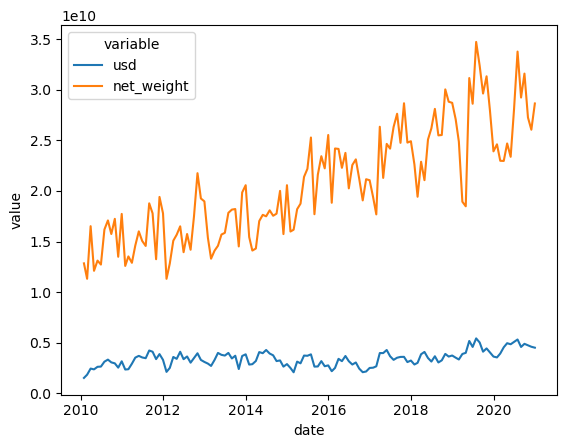

In [14]:
sns.lineplot(x='date', y='value', hue='variable', 
             data=pd.melt(monthly, ['date']).query("variable == 'usd' | variable == 'net_weight'"))

plt.show()

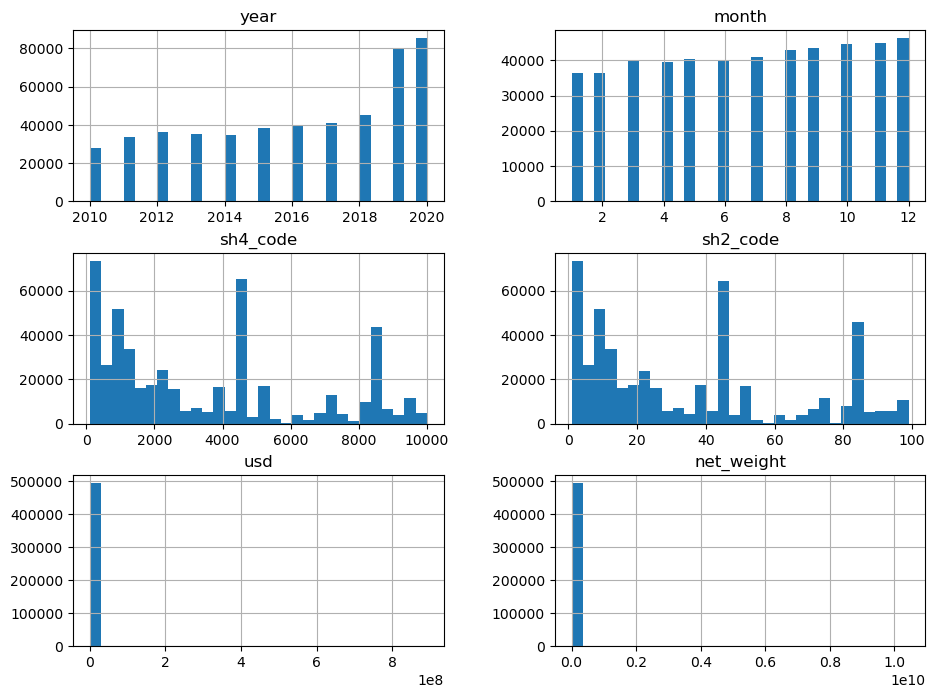

In [15]:
df.hist(bins=30, figsize=(11, 8))

# plt.figure(figsize=(20,100))

plt.show();

# Tipos de produtos mais exportados

In [16]:
df.groupby(by=["sh4_code"]).sum().sort_values(by=['usd'], ascending=False).reset_index(level=0).head()

,sh4_code,year,month,sh2_code,usd,net_weight
0,2601,9645646,30773,124410,122986780075,1870970686331
1,1201,51380877,148013,305892,94732011205,232096322969
2,1005,53199793,206998,263880,34686673005,190001257956
3,2304,13899153,45298,158631,33935965739,81740084670
4,2818,2977989,9712,41384,26850495734,93263486784


In [17]:
def plot_product_types(df=df, p_code="sh4_code", y="net_weight", n_values=20):
    '''
    This function plots the quantity of imported products in usd or weight
    '''
    # let's cut the desc columns, so the visuals look cleaner
    df.loc[:, ['sh4_desc']] = df['sh4_desc'].apply(lambda x: x[:25])
    df.loc[:, ['sh2_desc']] = df['sh2_desc'].apply(lambda x: x[:25])
    
    # here we define and order the values we want to plot
    imp_w = df.groupby(by=[p_code]).sum().sort_values(by=[y], ascending=False).reset_index(level=0).head(n_values)
    # then we plot them
    ax = imp_w.plot(x=p_code, y=y, kind="bar")

    plt.show()

## codigo de produtos: sh4

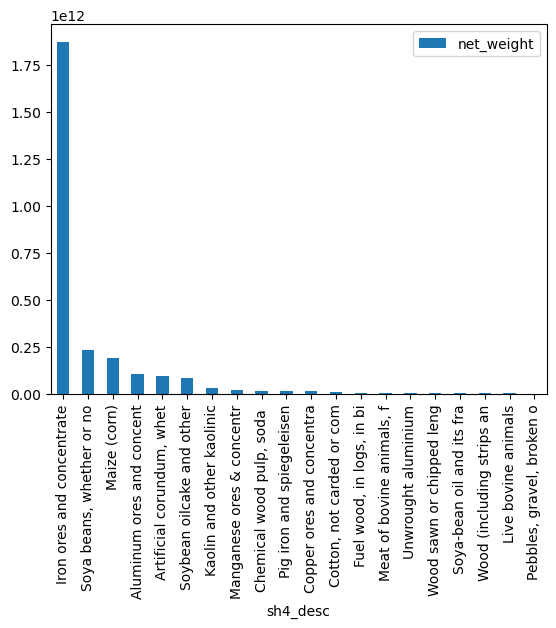

In [18]:
# most imported products by weight
plot_product_types(df=df, p_code="sh4_desc", y="net_weight", n_values=20)

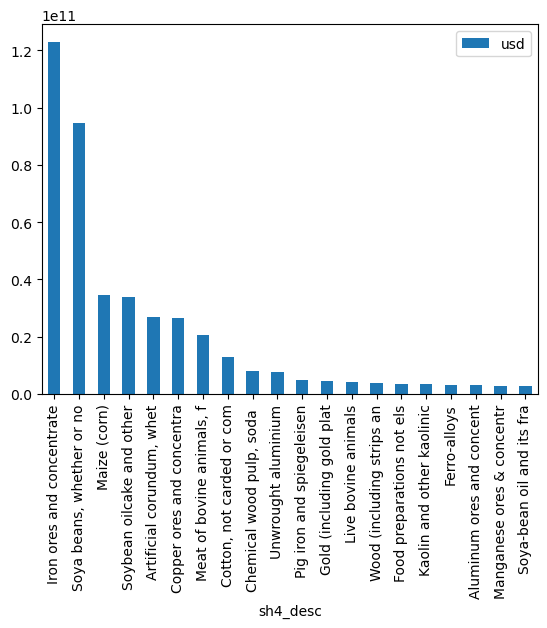

In [19]:
# most imported products by usd
plot_product_types(df=df, p_code="sh4_desc", y="usd", n_values=20)

## codigo de produtos: sh2

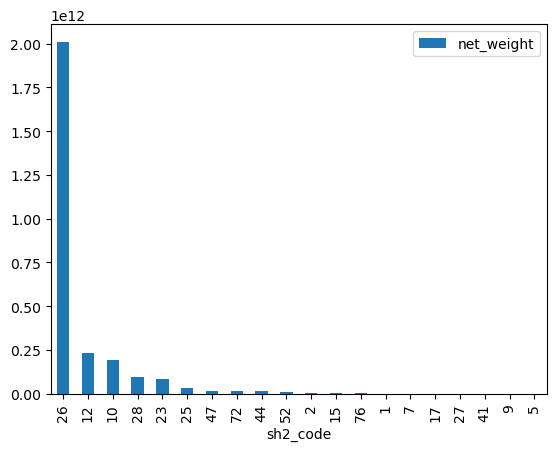

In [20]:
# most imported products by weight (code: sh2)
plot_product_types(df=df, p_code="sh2_code", y="net_weight", n_values=20)

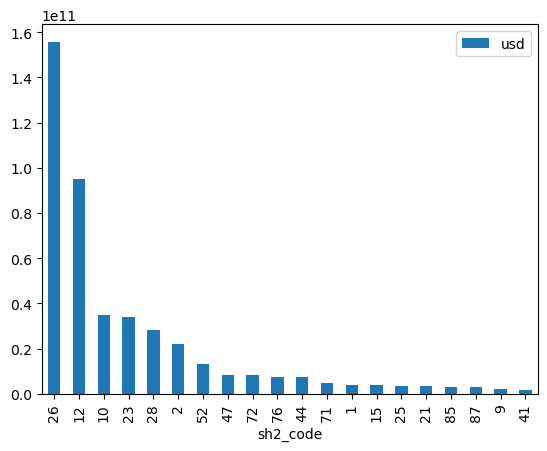

In [21]:
# most imported products by usd (code: sh2)
plot_product_types(df=df, p_code="sh2_code", y="usd", n_values=20)

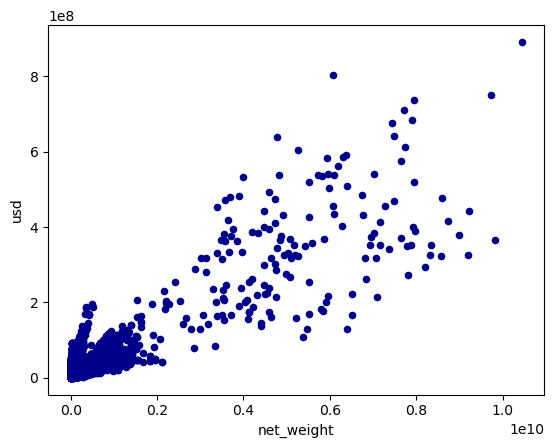

In [22]:
# aqui conseguimos visualizar a correlacao entre as exportacoes em usd e pesos 
ax1 = df.plot.scatter(x='net_weight',
                      y='usd',
                      c='DarkBlue')

plt.show()